In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from datetime import datetime

In [ ]:
df1=pd.read_csv('imu_data3.csv')
df2=pd.read_csv('imu_data4.csv')

In [124]:
df1.info

<bound method DataFrame.info of                time   Roll  Pitch   Yaw
0      17:38:47.384 -27.52  56.29   5.0
1      17:38:47.414 -26.38  57.12   6.0
2      17:38:47.446 -25.09  57.95   6.0
3      17:38:47.504 -23.66  58.81   6.0
4      17:38:47.536 -22.03  59.74   6.0
...             ...    ...    ...   ...
15413  17:47:38.325 -48.24  -0.84   2.0
15414  17:47:38.353 -47.42   1.17  24.0
15415  17:47:38.383 -47.88   2.71  24.0
15416  17:47:38.413 -48.59   4.08  24.0
15417  17:47:38.443 -48.75   5.44  25.0

[15418 rows x 4 columns]>

In [117]:
df2.info

<bound method DataFrame.info of               time    Roll  Pitch  Yaw
0     17:39:11.511  256.64  14.51  2.0
1     17:39:11.598  252.56  13.75  3.0
2     17:39:11.781  254.28  13.91  3.0
3     17:39:11.807  256.94  14.19  2.0
4     17:39:11.904  257.36  14.30  2.0
...            ...     ...    ...  ...
8529  17:53:37.221  -59.73  16.11  NaN
8530  17:53:37.284  -60.05  15.97  NaN
8531  17:53:37.401  -59.98  16.02  NaN
8532  17:53:37.496  -61.31  15.97  NaN
8533  17:53:37.583  -59.77  15.79  NaN

[8534 rows x 4 columns]>

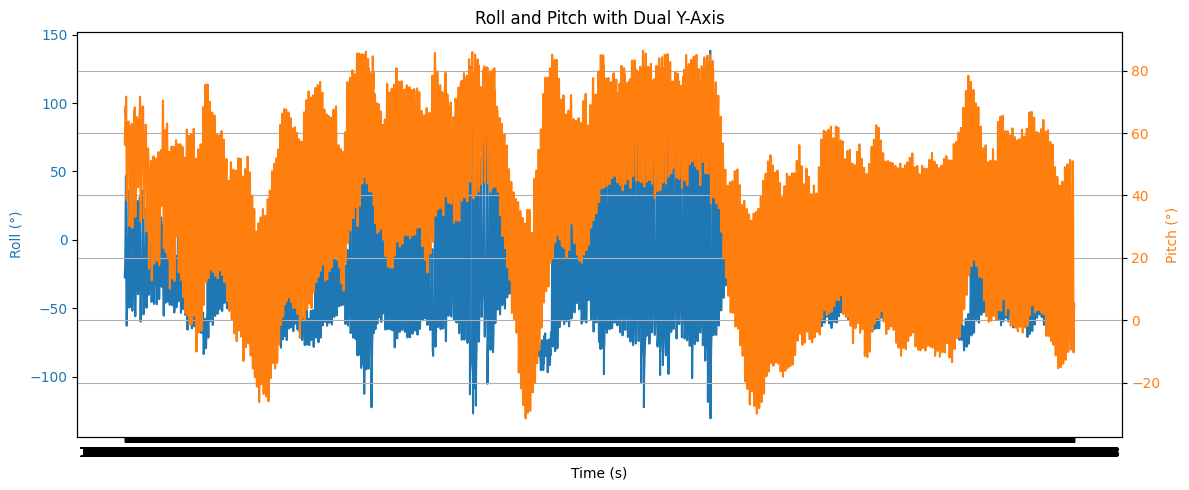

In [125]:
import matplotlib.pyplot as plt

# Figure Î∞è Îëê Ï∂ï ÏÉùÏÑ±
fig, ax1 = plt.subplots(figsize=(12, 5))

# ‚ñ∂ ÏôºÏ™Ω yÏ∂ï: Roll
color = 'tab:blue'
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Roll (¬∞)", color=color)
ax1.plot(df1["time"], df1["Roll"], color=color, label="Roll")
ax1.tick_params(axis='y', labelcolor=color)

# ‚ñ∂ Ïò§Î•∏Ï™Ω yÏ∂ï: Pitch
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel("Pitch (¬∞)", color=color)
ax2.plot(df1["time"], df1["Pitch"], color=color, label="Pitch")
ax2.tick_params(axis='y', labelcolor=color)

# Ï†úÎ™©, Í≤©Ïûê Îì±
plt.title("Roll and Pitch with Dual Y-Axis")
fig.tight_layout()
plt.grid(True)
plt.show()

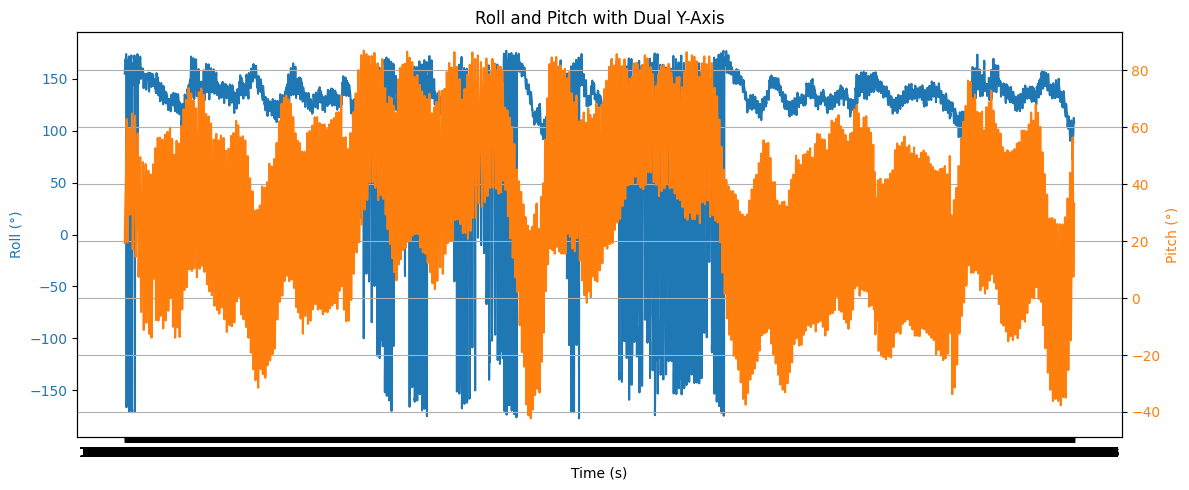

In [126]:
import matplotlib.pyplot as plt

# Figure Î∞è Îëê Ï∂ï ÏÉùÏÑ±
fig, ax1 = plt.subplots(figsize=(12, 5))

# ‚ñ∂ ÏôºÏ™Ω yÏ∂ï: Roll
color = 'tab:blue'
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Roll (¬∞)", color=color)
ax1.plot(df2["time"], df2["Roll"], color=color, label="Roll")
ax1.tick_params(axis='y', labelcolor=color)

# ‚ñ∂ Ïò§Î•∏Ï™Ω yÏ∂ï: Pitch
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel("Pitch (¬∞)", color=color)
ax2.plot(df2["time"], df2["Pitch"], color=color, label="Pitch")
ax2.tick_params(axis='y', labelcolor=color)

# Ï†úÎ™©, Í≤©Ïûê Îì±
plt.title("Roll and Pitch with Dual Y-Axis")
fig.tight_layout()
plt.grid(True)
plt.show()

In [120]:
df.head(10)

time    Roll  Pitch   Yaw    TimeSec
0  17:46:00.019  240.89 -31.86   NaN  63960.019
1  17:46:00.139  233.23 -16.40   NaN  63960.139
2  17:46:00.231  260.88  11.89  1.00  63960.231
3  17:46:00.320  246.34  -7.45  1.00  63960.320
4  17:46:00.441  -72.98  16.83  1.00  63960.441
5  17:46:00.531    4.17   3.66  5.79  63960.531
6  17:46:00.620  266.81  16.63  0.00  63960.620
7  17:46:00.739  232.56  14.47   NaN  63960.739
8  17:46:00.861  265.40  20.24   NaN  63960.861
9  17:46:00.919   -6.62  12.58 -9.00  63960.919

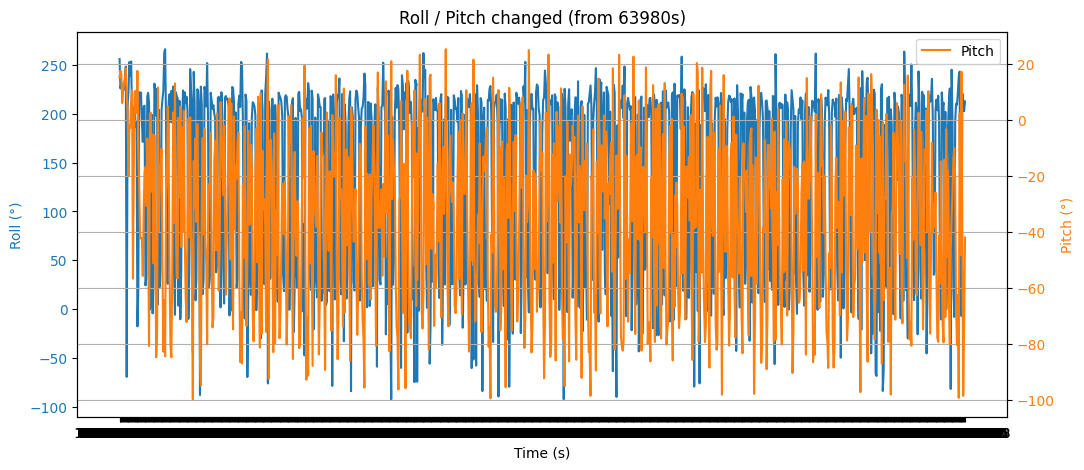

In [121]:
# TimeSec >= 63980Ïù∏ Íµ¨Í∞ÑÎßå ÌïÑÌÑ∞ÎßÅ (Ïù¥ÏÉÅÏπò Ï†úÍ±∞? Ïò§Î•òÍ∞í Ï†úÍ±∞?)
df_filtered = df[df["TimeSec"] >= 63980]

# Figure Î∞è Îëê Ï∂ï ÏÉùÏÑ±
fig, ax1 = plt.subplots(figsize=(12, 5))
# Roll / Pitch Í∑∏ÎûòÌîÑ Îã§Ïãú Í∑∏Î¶¨Í∏∞
# ‚ñ∂ ÏôºÏ™Ω yÏ∂ï: Roll
color = 'tab:blue'
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Roll (¬∞)", color=color)
ax1.plot(df_filtered["time"], df_filtered["Roll"], color=color, label="Roll")
ax1.tick_params(axis='y', labelcolor=color)

# ‚ñ∂ Ïò§Î•∏Ï™Ω yÏ∂ï: Pitch
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel("Pitch (¬∞)", color=color)
ax2.plot(df_filtered["time"], df_filtered["Pitch"], color=color, label="Pitch")
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Roll / Pitch changed (from 63980s)")
plt.legend()
plt.grid()
plt.show()

‚úÖ Ïò§Î•¥Îßâ Íµ¨Í∞Ñ Î∂ÑÏÑù Í∑∏ÎûòÌîÑ(uphill_detection_plot.png)Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


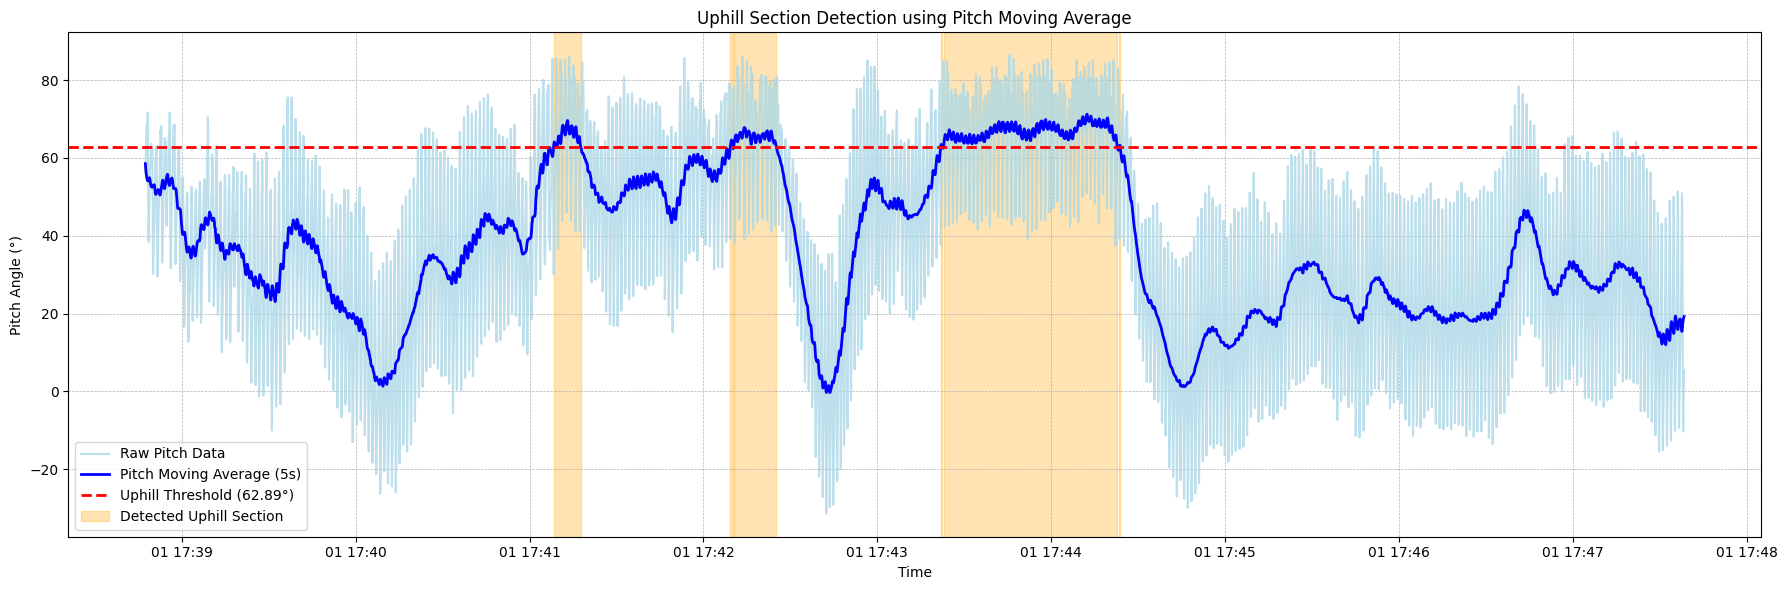

In [131]:

try:
    # 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è ÏãúÍ∞Ñ Î≥ÄÌôò
    df = pd.read_csv('imu_data3.csv')
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f')

    # 2. PitchÏùò Ïù¥Îèô ÌèâÍ∑† Í≥ÑÏÇ∞
    #    - window_size: Î™á Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÌèâÍ∑†ÏùÑ ÎÇºÏßÄ Í≤∞Ï†ï. 30Hz ÏÉòÌîåÎßÅÏù¥ÎØÄÎ°ú 150ÏùÄ 5Ï¥àÏóê Ìï¥Îãπ.
    #      Ïù¥ Í∞íÏùÑ Ï°∞Ï†àÌïòÏó¨ Ïä§Î¨¥Îî© Í∞ïÎèÑÎ•º Î≥ÄÍ≤ΩÌï† Ïàò ÏûàÏäµÎãàÎã§.
    window_size = 150 
    df['pitch_ma'] = df['Pitch'].rolling(window=window_size, center=True, min_periods=1).mean()

    # 3. Ïò§Î•¥Îßâ ÌåêÎã®ÏùÑ ÏúÑÌïú ÏûÑÍ≥ÑÍ∞í(Threshold) ÏÑ§Ï†ï
    #    - Ï†ÑÏ≤¥ Pitch ÌèâÍ∑†Ïóê ÌëúÏ§ÄÌé∏Ï∞®Î•º ÎçîÌïú Í∞íÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÇºÏäµÎãàÎã§.
    #      Ïù¥ Í∏∞Ï§ÄÎ≥¥Îã§ Ïù¥Îèô ÌèâÍ∑†Ïù¥ ÎÜíÏúºÎ©¥ Ïò§Î•¥ÎßâÏúºÎ°ú ÌåêÎã®Ìï©ÎãàÎã§.
    #    - std_multiplierÎ•º Ï°∞Ï†àÌïòÏó¨ ÎØºÍ∞êÎèÑÎ•º Î≥ÄÍ≤ΩÌï† Ïàò ÏûàÏäµÎãàÎã§. (e.g., 1.5Î°ú ÎÜíÏù¥Î©¥ Îçî Í∞ÄÌååÎ•∏ Ïò§Î•¥ÎßâÎßå Í∞êÏßÄ)
    std_multiplier = 1.0
    threshold = df['Pitch'].mean() + (df['Pitch'].std() * std_multiplier)

    # 4. ÏãúÍ∞ÅÌôî
    fig, ax = plt.subplots(figsize=(18, 6))

    # ÏõêÎ≥∏ Pitch Îç∞Ïù¥ÌÑ∞
    ax.plot(df['time'], df['Pitch'], color='lightblue', alpha=0.8, label='Raw Pitch Data')

    # Pitch Ïù¥Îèô ÌèâÍ∑† Îç∞Ïù¥ÌÑ∞
    ax.plot(df['time'], df['pitch_ma'], color='blue', linewidth=2, label='Pitch Moving Average (5s)')

    # Ïò§Î•¥Îßâ ÌåêÎã® ÏûÑÍ≥ÑÏÑ†
    ax.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label=f'Uphill Threshold ({threshold:.2f}¬∞)')

    # Ïò§Î•¥ÎßâÏúºÎ°ú ÌåêÎã®ÎêòÎäî Íµ¨Í∞Ñ ÏùåÏòÅ Ï≤òÎ¶¨
    uphill_sections = df['pitch_ma'] > threshold
    # ÏãúÏûëÍ≥º ÎÅùÏùÑ Ï∞æÏïÑÏÑú axvspanÏúºÎ°ú ÏòÅÏó≠ ÌëúÏãú
    start_time = None
    for i in range(1, len(uphill_sections)):
        if uphill_sections[i] and not uphill_sections[i-1]:
            start_time = df['time'].iloc[i]
        elif not uphill_sections[i] and uphill_sections[i-1] and start_time is not None:
            end_time = df['time'].iloc[i]
            ax.axvspan(start_time, end_time, color='orange', alpha=0.3, label='_nolegend_')
            start_time = None
    # ÎßàÏßÄÎßâ Íµ¨Í∞Ñ Ï≤òÎ¶¨
    if start_time is not None:
         ax.axvspan(start_time, df['time'].iloc[-1], color='orange', alpha=0.3, label='_nolegend_')


    ax.set_title('Uphill Section Detection using Pitch Moving Average')
    ax.set_xlabel('Time')
    ax.set_ylabel('Pitch Angle (¬∞)')
    
    # Î≤îÎ°Ä Ìï∏Îì§ ÏÉùÏÑ± (ÏùåÏòÅ ÏòÅÏó≠ Ìè¨Ìï®)
    handles, labels = ax.get_legend_handles_labels()
    from matplotlib.patches import Patch
    handles.append(Patch(color='orange', alpha=0.3, label='Detected Uphill Section'))
    ax.legend(handles=handles)

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('uphill_detection_plot.png')
    print("‚úÖ Ïò§Î•¥Îßâ Íµ¨Í∞Ñ Î∂ÑÏÑù Í∑∏ÎûòÌîÑ(uphill_detection_plot.png)Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


except FileNotFoundError:
    print("‚ùå imu_data3.csv ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
except Exception as e:
    print(f"Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")

--- ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÌõÑ Í≤∞Í≥º ---
‚úÖ Ï¥ù 544Í∞úÏùò Ïä§ÌÖù(ÌîºÌÅ¨)Ïù¥ Í∞êÏßÄÎêòÏóàÏäµÎãàÎã§.
ü¶∂ ÌèâÍ∑† Ïä§ÌÖù Ï£ºÍ∏∞: 0.975Ï¥à
‚ö° ÌèâÍ∑† Ïä§ÌÖù Ï£ºÌååÏàò: 1.03 Hz (steps/second)


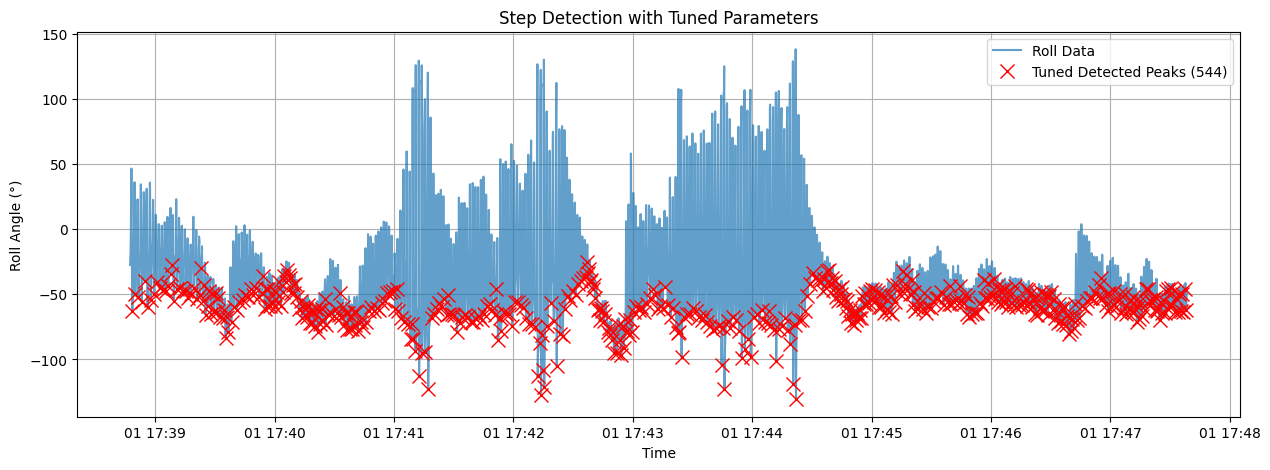

In [129]:
from scipy.signal import find_peaks


try:
    # 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
    df1 = pd.read_csv('imu_data3.csv')

    # 2. 'time' Ïó¥ÏùÑ datetime Í∞ùÏ≤¥Î°ú Î≥ÄÌôò
    df1['time'] = pd.to_datetime(df1['time'], format='%H:%M:%S.%f')

    # 3. [ÏàòÏ†ïÎêú Î∂ÄÎ∂Ñ] ÌîºÌÅ¨ Ï∞æÍ∏∞ ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï
    #    heightÏôÄ distanceÎ•º ÎÇÆÏ∂∞ÏÑú Îçî ÎØºÍ∞êÌïòÍ≤å Ïã§Ï†ú Ïä§ÌÖùÏùÑ Í∞êÏßÄÌïòÎèÑÎ°ù ÌäúÎãù
    peaks, _ = find_peaks(-df1["Roll"], height=25, distance=15)

    # 4. ÌîºÌÅ¨Í∞Ä Î∞úÏÉùÌïú ÏãúÍ∞ÑÎì§ÏùÑ Ï∂îÏ∂ú
    peak_times = df1["time"].iloc[peaks]

    # 5. Ïó∞ÏÜçÎêú ÌîºÌÅ¨ ÏÇ¨Ïù¥Ïùò ÏãúÍ∞Ñ Í∞ÑÍ≤©(Ï¥à)ÏùÑ Í≥ÑÏÇ∞
    step_intervals_seconds = peak_times.diff().dt.total_seconds().dropna()
    
    # 6. ÌèâÍ∑† ÏãúÍ∞Ñ Í∞ÑÍ≤©(Ï£ºÍ∏∞)Í≥º Ï£ºÌååÏàò Í≥ÑÏÇ∞
    if not step_intervals_seconds.empty:
        avg_interval = step_intervals_seconds.mean()
        avg_frequency = 1 / avg_interval

        print("--- ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÌõÑ Í≤∞Í≥º ---")
        print(f"‚úÖ Ï¥ù {len(peaks)}Í∞úÏùò Ïä§ÌÖù(ÌîºÌÅ¨)Ïù¥ Í∞êÏßÄÎêòÏóàÏäµÎãàÎã§.")
        print(f"ü¶∂ ÌèâÍ∑† Ïä§ÌÖù Ï£ºÍ∏∞: {avg_interval:.3f}Ï¥à")
        print(f"‚ö° ÌèâÍ∑† Ïä§ÌÖù Ï£ºÌååÏàò: {avg_frequency:.2f} Hz (steps/second)")

        # Í≤∞Í≥º ÏãúÍ∞ÅÌôî
        plt.figure(figsize=(15, 5))
        plt.plot(df1['time'], df1['Roll'], label='Roll Data', alpha=0.7)
        plt.plot(peak_times, df1['Roll'].iloc[peaks], "x", color='red', markersize=10, label=f'Tuned Detected Peaks ({len(peaks)})')
        plt.title('Step Detection with Tuned Parameters')
        plt.xlabel('Time')
        plt.ylabel('Roll Angle (¬∞)')
        plt.legend()
        plt.grid(True)
    else:
        print("‚ö†Ô∏è ÌîºÌÅ¨Î•º Ï∞æÏßÄ Î™ªÌñàÏäµÎãàÎã§. find_peaksÏùò heightÎÇò distance ÌååÎùºÎØ∏ÌÑ∞Î•º Îã§Ïãú Ï°∞Ï†ïÌï¥Î≥¥ÏÑ∏Ïöî.")

except FileNotFoundError:
    print("‚ùå imu_data3.csv ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
except Exception as e:
    print(f"Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")

‚úÖ Î≥¥Ìñâ ÏúÑÏÉÅÎèÑ(gait_cyclogram.png)Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
‚úÖ Ï§ëÏ≤© Ïä§ÌÖù Î∂ÑÏÑù Í∑∏ÎûòÌîÑ(overlaid_steps.png)Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


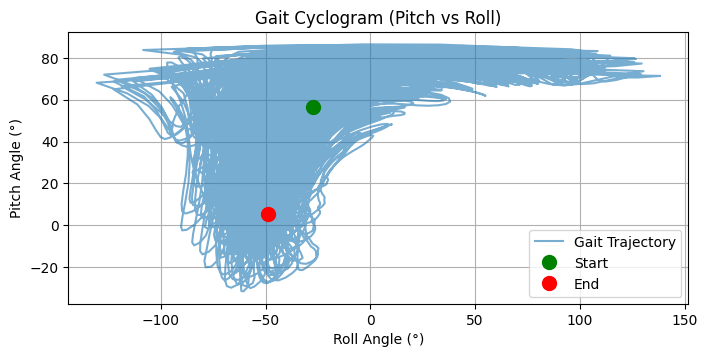

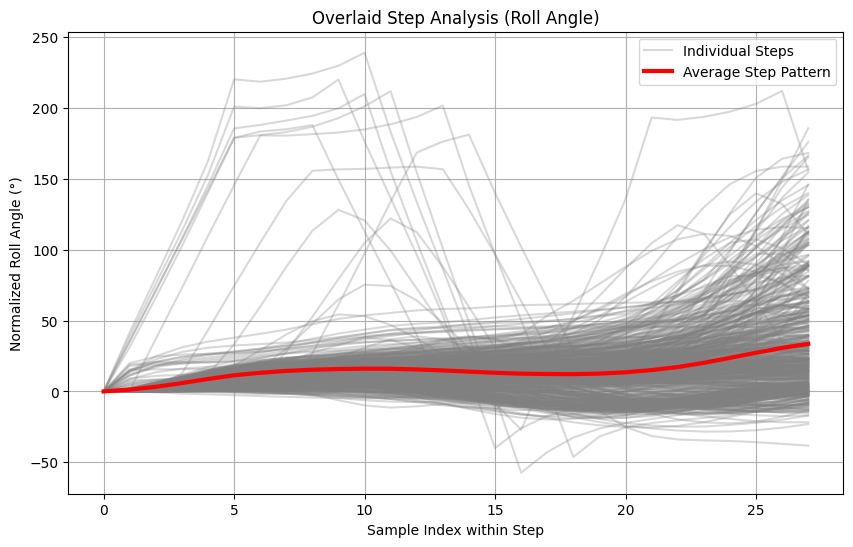

In [130]:

try:
    # 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è ÏãúÍ∞Ñ Î≥ÄÌôò
    df1 = pd.read_csv('imu_data3.csv')
    df1['time'] = pd.to_datetime(df1['time'], format='%H:%M:%S.%f')

    # 2. Ïù¥Ï†ÑÍ≥º ÎèôÏùºÌïú Ï°∞Í±¥ÏúºÎ°ú Ïä§ÌÖù(ÌîºÌÅ¨) Í∞êÏßÄ
    peaks, _ = find_peaks(-df1["Roll"], height=25, distance=15)

    # --- Î∂ÑÏÑù 1: Î≥¥Ìñâ ÏúÑÏÉÅÎèÑ (Gait Cyclogram) ---
    plt.figure(figsize=(8, 8))
    plt.plot(df1['Roll'], df1['Pitch'], alpha=0.6, label='Gait Trajectory')
    # ÏãúÏûëÏ†êÍ≥º ÎÅùÏ†ê ÌëúÏãú
    plt.plot(df1['Roll'].iloc[0], df1['Pitch'].iloc[0], 'go', markersize=10, label='Start')
    plt.plot(df1['Roll'].iloc[-1], df1['Pitch'].iloc[-1], 'ro', markersize=10, label='End')
    plt.title('Gait Cyclogram (Pitch vs Roll)')
    plt.xlabel('Roll Angle (¬∞)')
    plt.ylabel('Pitch Angle (¬∞)')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.savefig('gait_cyclogram.png')
    print("‚úÖ Î≥¥Ìñâ ÏúÑÏÉÅÎèÑ(gait_cyclogram.png)Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


    # --- Î∂ÑÏÑù 2: Ï§ëÏ≤© Ïä§ÌÖù Î∂ÑÏÑù (Overlaid Steps) ---
    plt.figure(figsize=(10, 6))
    
    # Í∞Å Ïä§ÌÖùÏùÑ ÏûòÎùºÎÇ¥Ïñ¥ Í≤πÏ≥ê Í∑∏Î¶¨Í∏∞
    # Ï≤´ ÌîºÌÅ¨Î∂ÄÌÑ∞ ÏãúÏûëÌïòÏó¨ ÏùºÏ†ïÌïú Í∏∏Ïù¥Î°ú ÏûòÎùºÎÇ¥Í∏∞ ÏúÑÌï¥, ÌèâÍ∑† Ïä§ÌÖù Í∞ÑÍ≤©ÏùÑ ÏÉòÌîå ÏàòÎ°ú Í≥ÑÏÇ∞
    avg_interval_samples = int(np.diff(peaks).mean())

    for i in range(len(peaks) - 1):
        # Í∞Å ÌîºÌÅ¨ ÏßÄÏ†êÎ∂ÄÌÑ∞ ÌèâÍ∑† Ïä§ÌÖù Í∏∏Ïù¥ÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÏ∂ú
        start_index = peaks[i]
        end_index = start_index + avg_interval_samples
        
        if end_index < len(df1):
            step_segment = df1['Roll'].iloc[start_index:end_index].values
            # Î™®Îì† Ïä§ÌÖùÏù¥ 0ÏóêÏÑú ÏãúÏûëÌïòÎèÑÎ°ù Ï†ïÍ∑úÌôî
            normalized_segment = step_segment - step_segment[0]
            
            # Ï≤´ Ïä§ÌÖùÎßå Î†àÏù¥Î∏îÏùÑ Ï∂îÍ∞Ä
            if i == 0:
                 plt.plot(normalized_segment, color='gray', alpha=0.3, label='Individual Steps')
            else:
                 plt.plot(normalized_segment, color='gray', alpha=0.3)

    # Î™®Îì† Ïä§ÌÖùÏùò ÌèâÍ∑† Í≥ÑÏÇ∞
    all_steps = []
    for i in range(len(peaks) - 1):
        start_index = peaks[i]
        end_index = start_index + avg_interval_samples
        if end_index < len(df1):
             step_segment = df1['Roll'].iloc[start_index:end_index].values
             normalized_segment = step_segment - step_segment[0]
             all_steps.append(normalized_segment)
    
    if all_steps:
        # Î∞∞Ïó¥ Í∏∏Ïù¥Î•º ÌÜµÏùºÌïòÍ∏∞ ÏúÑÌï¥ Í∞ÄÏû• ÏßßÏùÄ Í∏∏Ïù¥Ïóê ÎßûÏ∂§
        min_len = min(len(s) for s in all_steps)
        all_steps_truncated = [s[:min_len] for s in all_steps]
        mean_step = np.mean(all_steps_truncated, axis=0)
        plt.plot(mean_step, color='red', linewidth=3, label='Average Step Pattern')


    plt.title('Overlaid Step Analysis (Roll Angle)')
    plt.xlabel('Sample Index within Step')
    plt.ylabel('Normalized Roll Angle (¬∞)')
    plt.grid(True)
    plt.legend()
    plt.savefig('overlaid_steps.png')
    print("‚úÖ Ï§ëÏ≤© Ïä§ÌÖù Î∂ÑÏÑù Í∑∏ÎûòÌîÑ(overlaid_steps.png)Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


except FileNotFoundError:
    print("‚ùå imu_data3.csv ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
except Exception as e:
    print(f"Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")

Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ ÏôÑÎ£å: ÌèâÏßÄ 12921Í∞ú, Ïò§Î•¥Îßâ 2497Í∞ú ÏÉòÌîå
‚úÖ ÌèâÏßÄ Íµ¨Í∞Ñ Î∂ÑÏÑù Í∑∏ÎûòÌîÑ(gait_analysis_flat.png)Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.
‚úÖ Ïò§Î•¥Îßâ Íµ¨Í∞Ñ Î∂ÑÏÑù Í∑∏ÎûòÌîÑ(gait_analysis_uphill.png)Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


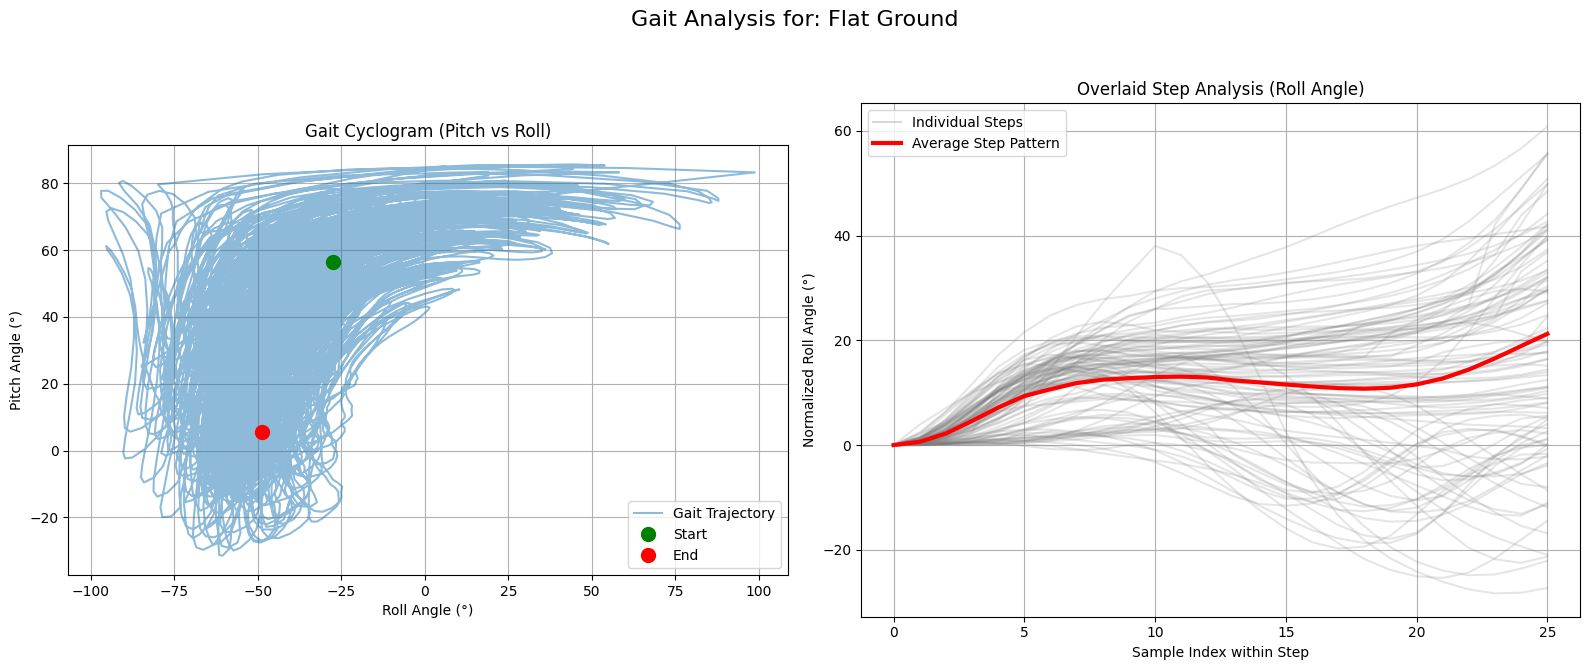

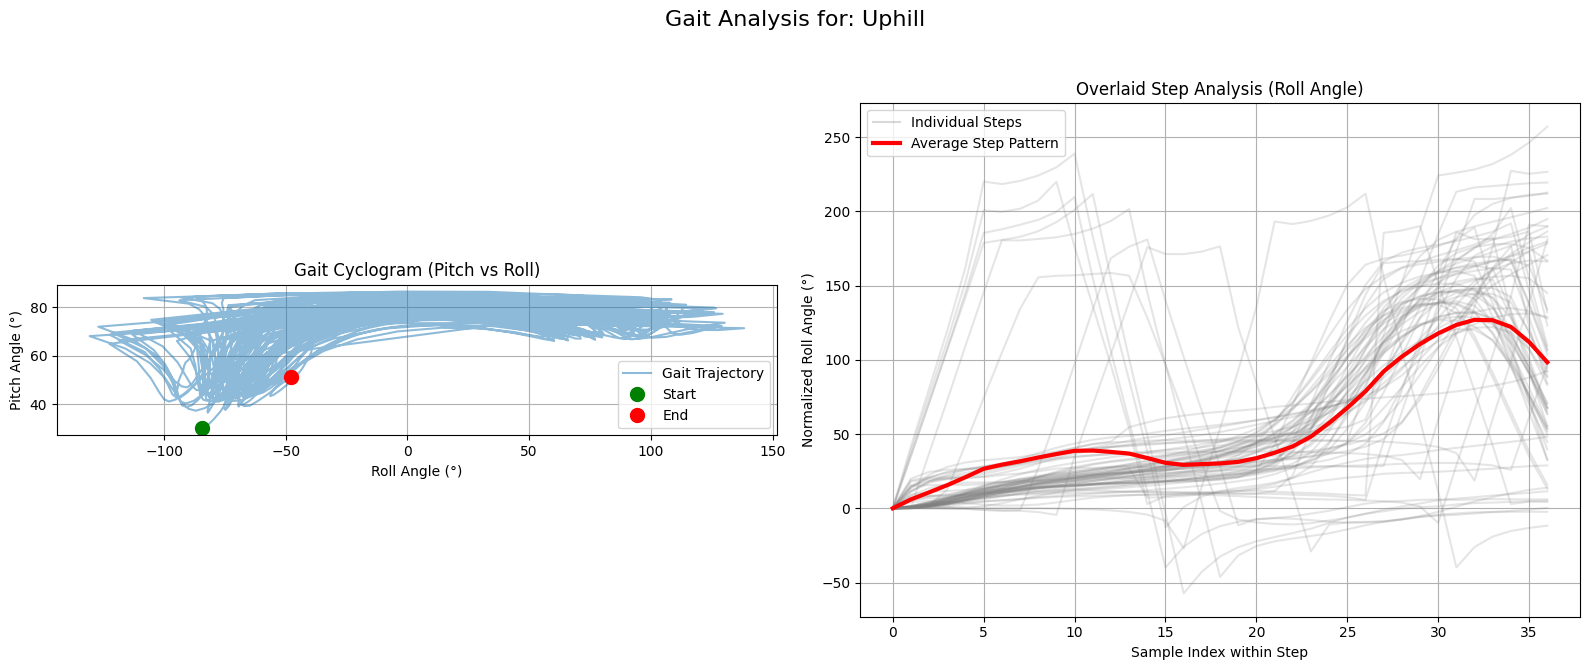

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def analyze_gait_by_condition(df, condition_name):
    """Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÎåÄÌï¥ Î≥¥Ìñâ Ï£ºÍ∏∞ Î∂ÑÏÑùÏùÑ ÏàòÌñâÌïòÍ≥† Í∑∏ÎûòÌîÑÎ•º Î∞òÌôòÌï©ÎãàÎã§."""
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle(f'Gait Analysis for: {condition_name}', fontsize=16)

    # --- Î∂ÑÏÑù 1: Î≥¥Ìñâ ÏúÑÏÉÅÎèÑ (Gait Cyclogram) ---
    ax1 = axes[0]
    ax1.plot(df['Roll'], df['Pitch'], alpha=0.5, label='Gait Trajectory')
    ax1.plot(df['Roll'].iloc[0], df['Pitch'].iloc[0], 'go', markersize=10, label='Start')
    ax1.plot(df['Roll'].iloc[-1], df['Pitch'].iloc[-1], 'ro', markersize=10, label='End')
    ax1.set_title('Gait Cyclogram (Pitch vs Roll)')
    ax1.set_xlabel('Roll Angle (¬∞)')
    ax1.set_ylabel('Pitch Angle (¬∞)')
    ax1.grid(True)
    ax1.set_aspect('equal', adjustable='box')
    ax1.legend()

    # --- Î∂ÑÏÑù 2: Ï§ëÏ≤© Ïä§ÌÖù Î∂ÑÏÑù (Overlaid Steps) ---
    ax2 = axes[1]
    peaks, _ = find_peaks(-df["Roll"], height=25, distance=15)
    
    if len(peaks) > 1:
        avg_interval_samples = int(np.diff(peaks).mean())
        
        all_steps = []
        for i in range(len(peaks) - 1):
            start_index = peaks[i]
            end_index = start_index + avg_interval_samples
            if end_index < len(df):
                step_segment = df['Roll'].iloc[start_index:end_index].values
                normalized_segment = step_segment - step_segment[0]
                all_steps.append(normalized_segment)
                if i < 100: # ÎÑàÎ¨¥ ÎßéÏúºÎ©¥ ÎäêÎ†§ÏßÄÎØÄÎ°ú 100Í∞úÍπåÏßÄÎßå ÌöåÏÉâÏúºÎ°ú ÌëúÏãú
                    ax2.plot(normalized_segment, color='gray', alpha=0.2)

        if all_steps:
            ax2.plot([], [], color='gray', alpha=0.3, label='Individual Steps') # Î≤îÎ°ÄÏö©
            min_len = min(len(s) for s in all_steps)
            all_steps_truncated = [s[:min_len] for s in all_steps]
            mean_step = np.mean(all_steps_truncated, axis=0)
            ax2.plot(mean_step, color='red', linewidth=3, label='Average Step Pattern')

    ax2.set_title('Overlaid Step Analysis (Roll Angle)')
    ax2.set_xlabel('Sample Index within Step')
    ax2.set_ylabel('Normalized Roll Angle (¬∞)')
    ax2.grid(True)
    ax2.legend()
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    return fig

try:
    # 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ïò§Î•¥Îßâ/ÌèâÏßÄ Î∂ÑÎ¶¨
    df = pd.read_csv('imu_data3.csv')
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f').dt.tz_localize(None) # ÏãúÍ∞ÑÎåÄ Ï†ïÎ≥¥ Ï†úÍ±∞

    window_size = 150
    df['pitch_ma'] = df['Pitch'].rolling(window=window_size, center=True, min_periods=1).mean()
    threshold = df['Pitch'].mean() + (df['Pitch'].std() * 1.0)
    
    is_uphill = df['pitch_ma'] > threshold
    
    df_flat = df[~is_uphill].copy()
    df_uphill = df[is_uphill].copy()

    print(f"Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ ÏôÑÎ£å: ÌèâÏßÄ {len(df_flat)}Í∞ú, Ïò§Î•¥Îßâ {len(df_uphill)}Í∞ú ÏÉòÌîå")

    # 2. Í∞Å Ï°∞Í±¥Ïóê ÎåÄÌï¥ Î∂ÑÏÑù Ïã§Ìñâ Î∞è Ï†ÄÏû•
    if not df_flat.empty:
        fig_flat = analyze_gait_by_condition(df_flat, "Flat Ground")
        fig_flat.savefig('gait_analysis_flat.png')
        print("‚úÖ ÌèâÏßÄ Íµ¨Í∞Ñ Î∂ÑÏÑù Í∑∏ÎûòÌîÑ(gait_analysis_flat.png)Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
    
    if not df_uphill.empty:
        fig_uphill = analyze_gait_by_condition(df_uphill, "Uphill")
        fig_uphill.savefig('gait_analysis_uphill.png')
        print("‚úÖ Ïò§Î•¥Îßâ Íµ¨Í∞Ñ Î∂ÑÏÑù Í∑∏ÎûòÌîÑ(gait_analysis_uphill.png)Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

except FileNotFoundError:
    print("‚ùå imu_data3.csv ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
except Exception as e:
    print(f"Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")

--- ÏûêÏÑ∏ Ï†ïÎ†¨ Î∂ÑÏÑù Í≤∞Í≥º ---
Î∂ÑÏÑùÎêú Ï¥ù Ïä§ÌÖù Ïàò: 542Í∞ú
Ïä§Ïúô Ïãú ÌèâÍ∑† Yaw Í∞ÅÎèÑ: 27.13¬∞
Yaw Í∞ÅÎèÑ ÌëúÏ§ÄÌé∏Ï∞®: 58.87¬∞ (Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù ÏùºÍ¥ÄÎêú ÏûêÏÑ∏)

‚úÖ ÏûêÏÑ∏ Ï†ïÎ†¨ Î∂ÑÏÑù Í∑∏ÎûòÌîÑ(posture_alignment_analysis.png)Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


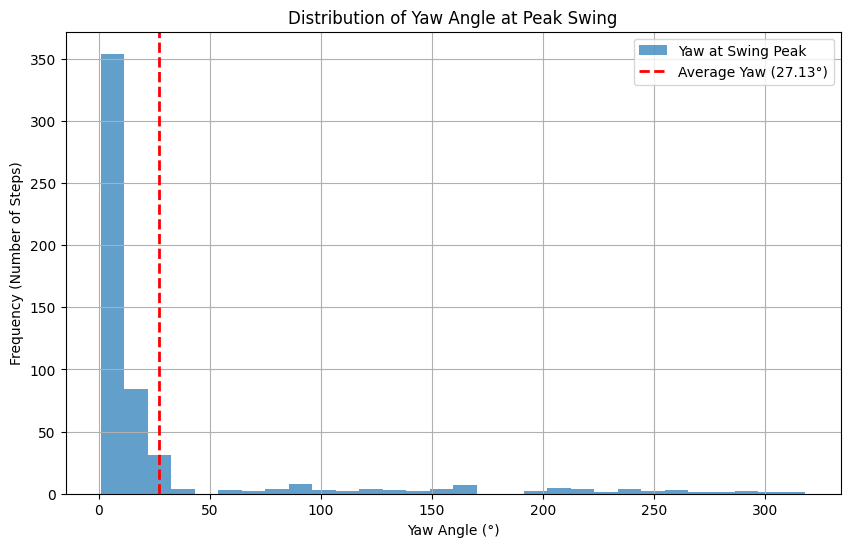

In [5]:

try:
    # 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è ÏãúÍ∞Ñ Î≥ÄÌôò
    df = pd.read_csv('imu_data3.csv')
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f')

    # 2. Roll Í∞í Í∏∞Ï§ÄÏúºÎ°ú Í∞Å Ïä§ÌÖùÏùÑ Íµ¨Î∂ÑÌïòÍ∏∞ ÏúÑÌïú ÌîºÌÅ¨(Í≥®ÏßúÍ∏∞) Ï∞æÍ∏∞
    step_peaks, _ = find_peaks(-df["Roll"], height=25, distance=15)
    
    # 3. Í∞Å Ïä§ÌÖùÏùò Ïä§Ïúô ÏµúÍ≥†Ï†êÏóêÏÑú Yaw Í∞íÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
    yaw_at_swing_peak = []

    # 4. Í∞Å Ïä§ÌÖù Íµ¨Í∞ÑÏùÑ ÏàúÌöåÌïòÎ©∞ Î∂ÑÏÑù
    for i in range(len(step_peaks) - 1):
        # ÌòÑÏû¨ Ïä§ÌÖùÏùò ÏãúÏûëÍ≥º ÎÅù Ïù∏Îç±Ïä§ Ï†ïÏùò
        start_idx = step_peaks[i]
        end_idx = step_peaks[i+1]
        
        # ÌòÑÏû¨ Ïä§ÌÖù Íµ¨Í∞ÑÏùò Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
        step_df = df.iloc[start_idx:end_idx]
        
        # Ïä§ÌÖù Íµ¨Í∞Ñ ÎÇ¥ÏóêÏÑú PitchÍ∞Ä ÏµúÎåÄÏù∏ ÏßÄÏ†ê(Ïä§Ïúô ÏµúÍ≥†Ï†ê)ÏùÑ Ï∞æÏùå
        if not step_df.empty:
            peak_pitch_idx = step_df['Pitch'].idxmax()
            
            # Ìï¥Îãπ ÏßÄÏ†êÏùò Yaw Í∞íÏùÑ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä (NaNÏù¥ ÏïÑÎãå Í≤ΩÏö∞ÏóêÎßå)
            yaw_value = df.loc[peak_pitch_idx, 'Yaw']
            if pd.notna(yaw_value):
                yaw_at_swing_peak.append(yaw_value)

    # 5. Í≤∞Í≥º Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî
    if yaw_at_swing_peak:
        yaw_array = np.array(yaw_at_swing_peak)
        
        # ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
        mean_yaw = np.mean(yaw_array)
        std_yaw = np.std(yaw_array)
        
        print("--- ÏûêÏÑ∏ Ï†ïÎ†¨ Î∂ÑÏÑù Í≤∞Í≥º ---")
        print(f"Î∂ÑÏÑùÎêú Ï¥ù Ïä§ÌÖù Ïàò: {len(yaw_array)}Í∞ú")
        print(f"Ïä§Ïúô Ïãú ÌèâÍ∑† Yaw Í∞ÅÎèÑ: {mean_yaw:.2f}¬∞")
        print(f"Yaw Í∞ÅÎèÑ ÌëúÏ§ÄÌé∏Ï∞®: {std_yaw:.2f}¬∞ (Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù ÏùºÍ¥ÄÎêú ÏûêÏÑ∏)")
        
        # ÌûàÏä§ÌÜ†Í∑∏Îû® ÏãúÍ∞ÅÌôî
        plt.figure(figsize=(10, 6))
        plt.hist(yaw_array, bins=30, alpha=0.7, label='Yaw at Swing Peak')
        plt.axvline(mean_yaw, color='red', linestyle='--', linewidth=2, label=f'Average Yaw ({mean_yaw:.2f}¬∞)')
        
        plt.title('Distribution of Yaw Angle at Peak Swing')
        plt.xlabel('Yaw Angle (¬∞)')
        plt.ylabel('Frequency (Number of Steps)')
        plt.legend()
        plt.grid(True)
        
        plt.savefig('posture_alignment_analysis.png')
        print("\n‚úÖ ÏûêÏÑ∏ Ï†ïÎ†¨ Î∂ÑÏÑù Í∑∏ÎûòÌîÑ(posture_alignment_analysis.png)Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

    else:
        print("‚ö†Ô∏è Î∂ÑÏÑùÌï† Ïä§ÌÖù Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±Ìï©ÎãàÎã§.")

except FileNotFoundError:
    print("‚ùå imu_data3.csv ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
except Exception as e:
    print(f"Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")

          Time_sec  Left_Knee_Angle  Right_Knee_Angle  Step_Width_px
count  2224.000000      2224.000000       2224.000000    2224.000000
mean     66.631746       164.074554        168.859269      23.865818
std      25.935350        21.554442         17.700484      22.174982
min      11.737668         1.385704         10.587609       0.046406
25%      44.028308       161.902078        168.747542       8.661215
50%      67.077863       171.133363        174.441753      19.052171
75%      89.329061       175.991724        177.623520      33.548727
max     110.968726       179.994888        179.999765     252.474613


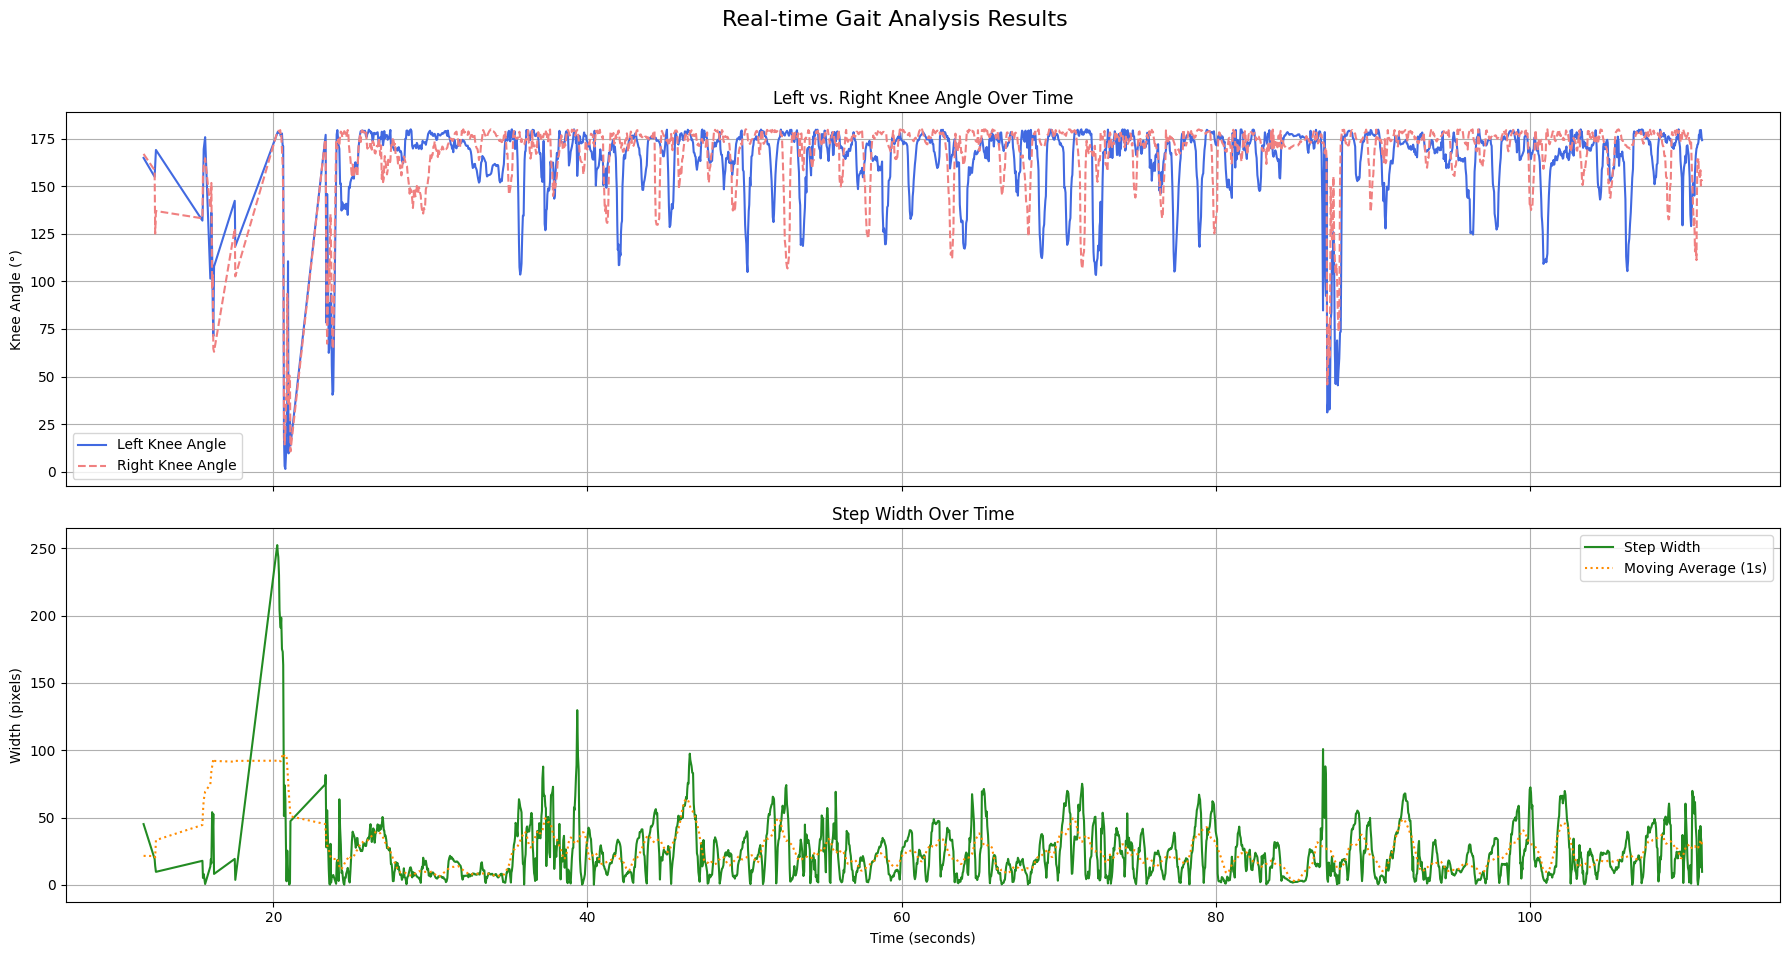

In [11]:

try:
    # 1. Î∞©Í∏à Ï†ÄÏû•Ìïú CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
    df = pd.read_csv('realtime_gait_analysis.csv')

    # 2. Î∂ÑÏÑù Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    # 2Í∞úÏùò Í∑∏ÎûòÌîÑÎ•º ÏúÑÏïÑÎûòÎ°ú Î∞∞Ïπò
    fig, axes = plt.subplots(2, 1, figsize=(18, 10), sharex=True)
    fig.suptitle('Real-time Gait Analysis Results', fontsize=16)

    # --- Í∑∏ÎûòÌîÑ 1: Ï¢åÏö∞ Î¨¥Î¶é Í∞ÅÎèÑ Î≥ÄÌôî ---
    axes[0].plot(df['Time_sec'], df['Left_Knee_Angle'], label='Left Knee Angle', color='royalblue')
    axes[0].plot(df['Time_sec'], df['Right_Knee_Angle'], label='Right Knee Angle', color='lightcoral', linestyle='--')
    axes[0].set_title('Left vs. Right Knee Angle Over Time')
    axes[0].set_ylabel('Knee Angle (¬∞)')
    axes[0].grid(True)
    axes[0].legend()

    # --- Í∑∏ÎûòÌîÑ 2: Î≥¥Ìè≠ ÎÑàÎπÑ Î≥ÄÌôî ---
    axes[1].plot(df['Time_sec'], df['Step_Width_px'], label='Step Width', color='forestgreen')
    
    # Î≥¥Ìè≠ ÎÑàÎπÑÏùò Ïù¥Îèô ÌèâÍ∑†ÏùÑ Ìï®Íªò Í∑∏Î†§ÏÑú Ï∂îÏÑ∏Î•º ÌôïÏù∏
    rolling_avg = df['Step_Width_px'].rolling(window=30, center=True, min_periods=1).mean()
    axes[1].plot(df['Time_sec'], rolling_avg, label='Moving Average (1s)', color='darkorange', linestyle=':')
    
    axes[1].set_title('Step Width Over Time')
    axes[1].set_ylabel('Width (pixels)')
    axes[1].set_xlabel('Time (seconds)')
    axes[1].grid(True)
    axes[1].legend()

    # Í∑∏ÎûòÌîÑ Î†àÏù¥ÏïÑÏõÉ Ï†ïÎ¶¨ Î∞è ÌååÏùº Ï†ÄÏû•
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    print(df.describe())


except FileNotFoundError:
    print("‚ùå 'realtime_gait_analysis.csv' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. ÌååÏùºÏù¥ Ïä§ÌÅ¨Î¶ΩÌä∏ÏôÄ Í∞ôÏùÄ Ìè¥ÎçîÏóê ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
except Exception as e:
    print(f"Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")

‚úÖ Îç∞Ïù¥ÌÑ∞ ÎèôÍ∏∞Ìôî Î∞è ÏûêÎ•¥Í∏∞ ÏôÑÎ£å!

üìà ÏµúÏ¢Ö ÍµêÏ∞® Í≤ÄÏ¶ù Í∑∏ÎûòÌîÑ(final_cross_validation_sync.png)Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


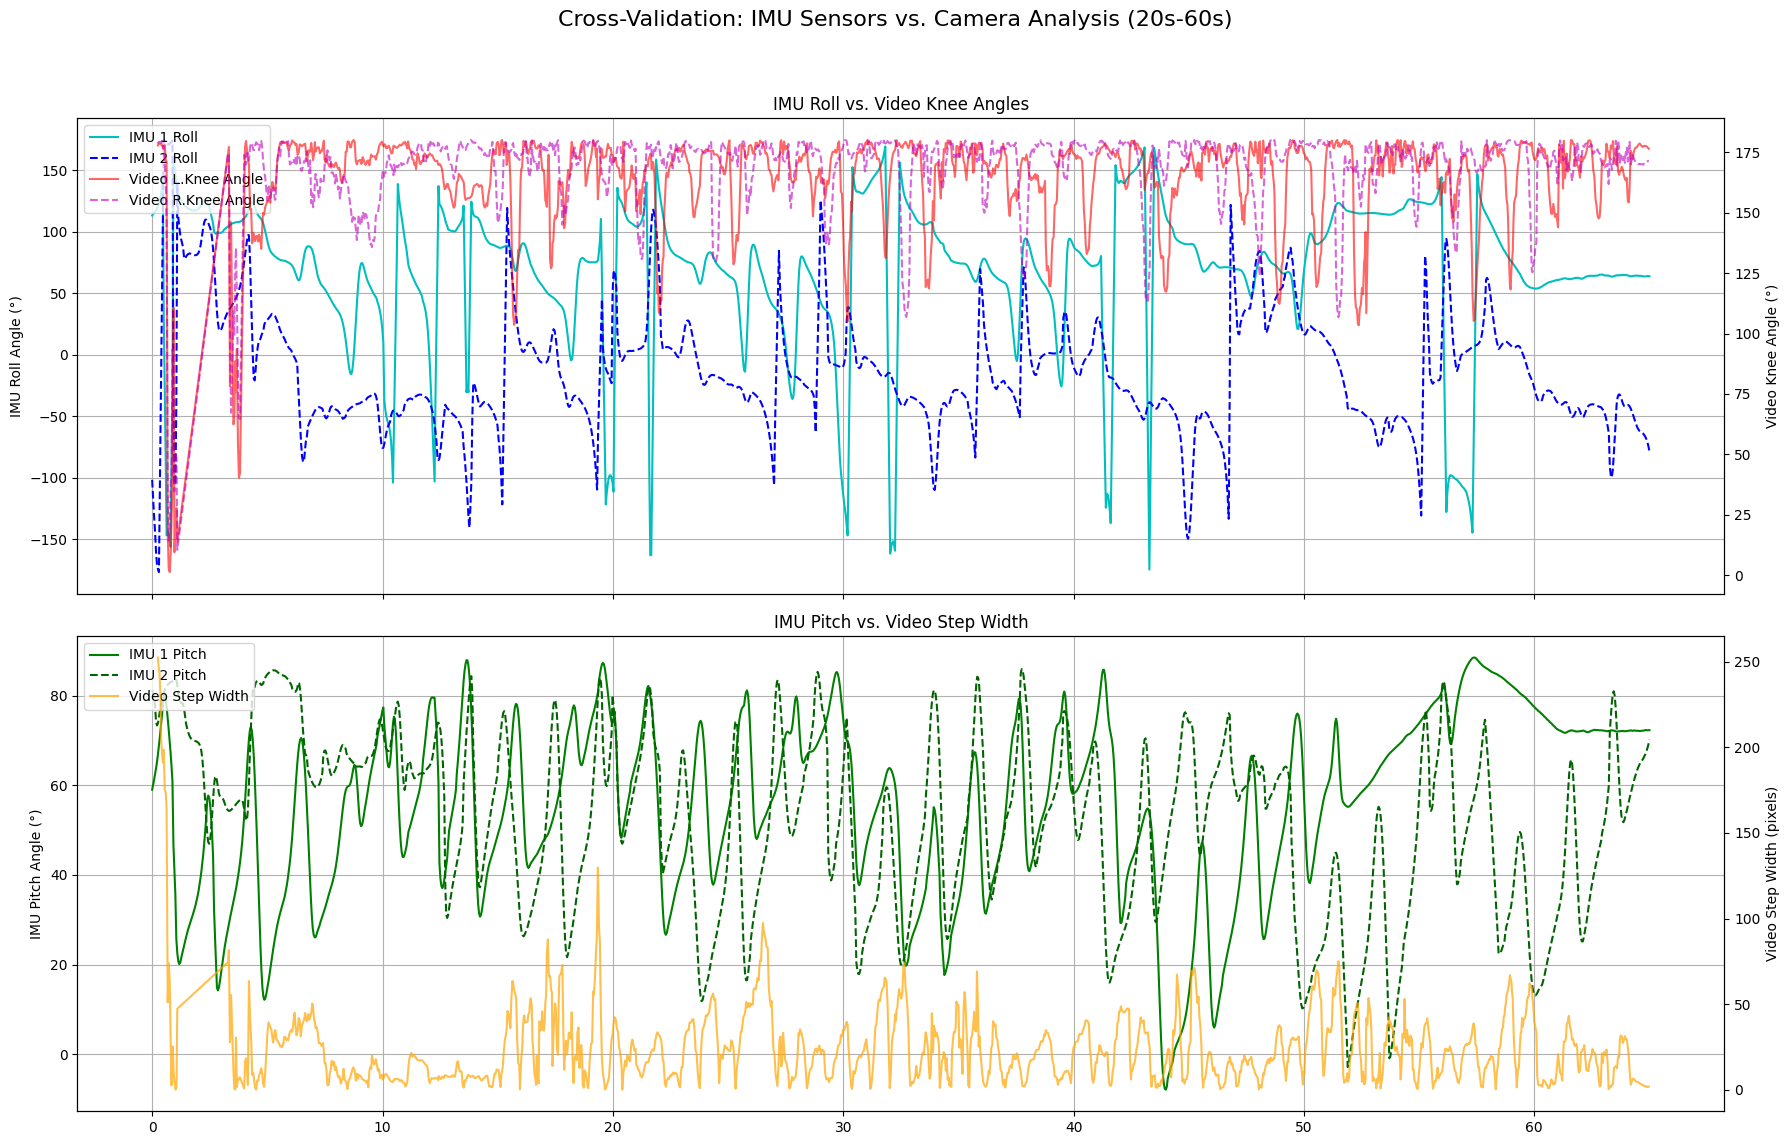

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def find_stomp_index(df, signal_column):
    """Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÍ≥º Ïª¨ÎüºÎ™ÖÏúºÎ°ú Ï∂©Í≤©ÎüâÏù¥ Í∞ÄÏû• ÌÅ∞ ÏßÄÏ†êÏùò Ïù∏Îç±Ïä§Î•º Ï∞æÏäµÎãàÎã§."""
    signal = df[signal_column]
    impact_magnitude = signal.diff().abs()
    stomp_index = impact_magnitude.idxmax()
    # Ï≤´ Îç∞Ïù¥ÌÑ∞Ïùò diffÎäî NaNÏù¥ÎØÄÎ°ú, 1ÏùÑ ÎçîÌï¥Ï§å
    return stomp_index if pd.notna(stomp_index) else 1

try:
    # 1. Î™®Îì† Îç∞Ïù¥ÌÑ∞ ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
    imu5_df = pd.read_csv('imu_data5.csv')
    imu6_df = pd.read_csv('imu_data6.csv')
    video_df = pd.read_csv('realtime_gait_analysis.csv')

    # 2. Í∞Å Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 'Î∞ú Íµ¨Î•¥Í∏∞' ÎèôÍ∏∞Ìôî ÏßÄÏ†ê ÌÉêÏßÄ
    stomp_idx_imu5 = find_stomp_index(imu5_df, 'Roll')
    stomp_idx_imu6 = find_stomp_index(imu6_df, 'Roll')
    stomp_idx_video = find_stomp_index(video_df, 'Left_Knee_Angle')

    # 3. Î∂ÑÏÑù Íµ¨Í∞Ñ ÏûêÎ•¥Í∏∞
    # Í∏∞Ï§ÄÏù¥ ÎêòÎäî ÏòÅÏÉÅ Îç∞Ïù¥ÌÑ∞Ïùò ÏãúÍ∞Ñ Ï†ïÏùò
    video_start_sec = 20.0
    video_end_sec = 85.0
    
    # ÏòÅÏÉÅ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 20Ï¥àÏôÄ 60Ï¥àÏóê Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ïù∏Îç±Ïä§ Ï∞æÍ∏∞
    video_start_idx = (video_df['Time_sec'] - video_start_sec).abs().idxmin()
    video_end_idx = (video_df['Time_sec'] - video_end_sec).abs().idxmin()

    # Î∞ú Íµ¨Î•¥Í∏∞ ÏãúÏ†êÍ≥º Î∂ÑÏÑù ÏãúÏûë ÏãúÏ†ê ÏÇ¨Ïù¥Ïùò ÏÉòÌîå Ïàò Ï∞®Ïù¥ Í≥ÑÏÇ∞
    offset_samples = video_start_idx - stomp_idx_video
    
    # Î∂ÑÏÑùÌï† ÏÉòÌîå Í∏∏Ïù¥ Í≥ÑÏÇ∞
    analysis_samples = video_end_idx - video_start_idx
    
    # Í∞Å IMU Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÏÑù ÏãúÏûë/ÎÅù Ïù∏Îç±Ïä§ Í≥ÑÏÇ∞
    imu5_start_idx = stomp_idx_imu5 + offset_samples
    imu5_end_idx = imu5_start_idx + analysis_samples
    
    imu6_start_idx = stomp_idx_imu6 + offset_samples
    imu6_end_idx = imu6_start_idx + analysis_samples

    # Í∞Å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Ï†ïÏùòÎêú Íµ¨Í∞ÑÏúºÎ°ú ÏûêÎ•¥Í∏∞
    imu5_cropped = imu5_df.iloc[imu5_start_idx:imu5_end_idx].copy()
    imu6_cropped = imu6_df.iloc[imu6_start_idx:imu6_end_idx].copy()
    video_cropped = video_df.iloc[video_start_idx:video_end_idx].copy()

    # ÎπÑÍµêÎ•º ÏúÑÌï¥ ÏÉàÎ°úÏö¥ ÏãúÍ∞Ñ Ï∂ï(0Ï¥àÎ∂ÄÌÑ∞ ÏãúÏûë) ÏÉùÏÑ±
    imu5_cropped['Rel_Time'] = np.linspace(0, video_end_sec - video_start_sec, len(imu5_cropped))
    imu6_cropped['Rel_Time'] = np.linspace(0, video_end_sec - video_start_sec, len(imu6_cropped))
    video_cropped['Rel_Time'] = video_cropped['Time_sec'] - video_start_sec

    print("‚úÖ Îç∞Ïù¥ÌÑ∞ ÎèôÍ∏∞Ìôî Î∞è ÏûêÎ•¥Í∏∞ ÏôÑÎ£å!")

    # 4. ÎπÑÍµê ÏãúÍ∞ÅÌôî
    fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True)
    fig.suptitle('Cross-Validation: IMU Sensors vs. Camera Analysis (20s-85s)', fontsize=16)

    # --- Í∑∏ÎûòÌîÑ 1: IMU Roll vs. Video Knee Angle ---
    ax1 = axes[0]
    ax1_twin = ax1.twinx()
    
    p1, = ax1.plot(imu5_cropped['Rel_Time'], imu5_cropped['Roll'], 'c-', label='IMU 1 Roll')
    p2, = ax1.plot(imu6_cropped['Rel_Time'], imu6_cropped['Roll'], 'b--', label='IMU 2 Roll')
    p3, = ax1_twin.plot(video_cropped['Rel_Time'], video_cropped['Left_Knee_Angle'], 'r-', alpha=0.6, label='Video L.Knee Angle')
    p4, = ax1_twin.plot(video_cropped['Rel_Time'], video_cropped['Right_Knee_Angle'], 'm--', alpha=0.6, label='Video R.Knee Angle')
    
    ax1.set_ylabel('IMU Roll Angle (¬∞)')
    ax1_twin.set_ylabel('Video Knee Angle (¬∞)')
    ax1.set_title('IMU Roll vs. Video Knee Angles')
    ax1.grid(True)
    ax1.legend(handles=[p1, p2, p3, p4], loc='upper left')

    # --- Í∑∏ÎûòÌîÑ 2: IMU Pitch vs. Video Step Width ---
    ax2 = axes[1]
    ax2_twin = ax2.twinx()
    
    p5, = ax2.plot(imu5_cropped['Rel_Time'], imu5_cropped['Pitch'], 'g-', label='IMU 1 Pitch')
    p6, = ax2.plot(imu6_cropped['Rel_Time'], imu6_cropped['Pitch'], 'darkgreen', linestyle='--', label='IMU 2 Pitch')
    p7, = ax2_twin.plot(video_cropped['Rel_Time'], video_cropped['Step_Width_px'], 'orange', alpha=0.7, label='Video Step Width')
    
    ax2.set_ylabel('IMU Pitch Angle (¬∞)')
    ax2_twin.set_ylabel('Video Step Width (pixels)')
    ax2.set_title('IMU Pitch vs. Video Step Width')
    ax2.grid(True)
    ax2.legend(handles=[p5, p6, p7], loc='upper left')

    plt.xlabel('Analysis Time (seconds)')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

except FileNotFoundError:
    print("‚ùå ÌïÑÏöîÌïú CSV ÌååÏùºÎì§ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. (imu_data5.csv, imu_data6.csv, realtime_gait_analysis.csv)")
except Exception as e:
    print(f"Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")

‚úÖ Îç∞Ïù¥ÌÑ∞ ÎèôÍ∏∞Ìôî Î∞è ÌÜµÌï© ÏôÑÎ£å!


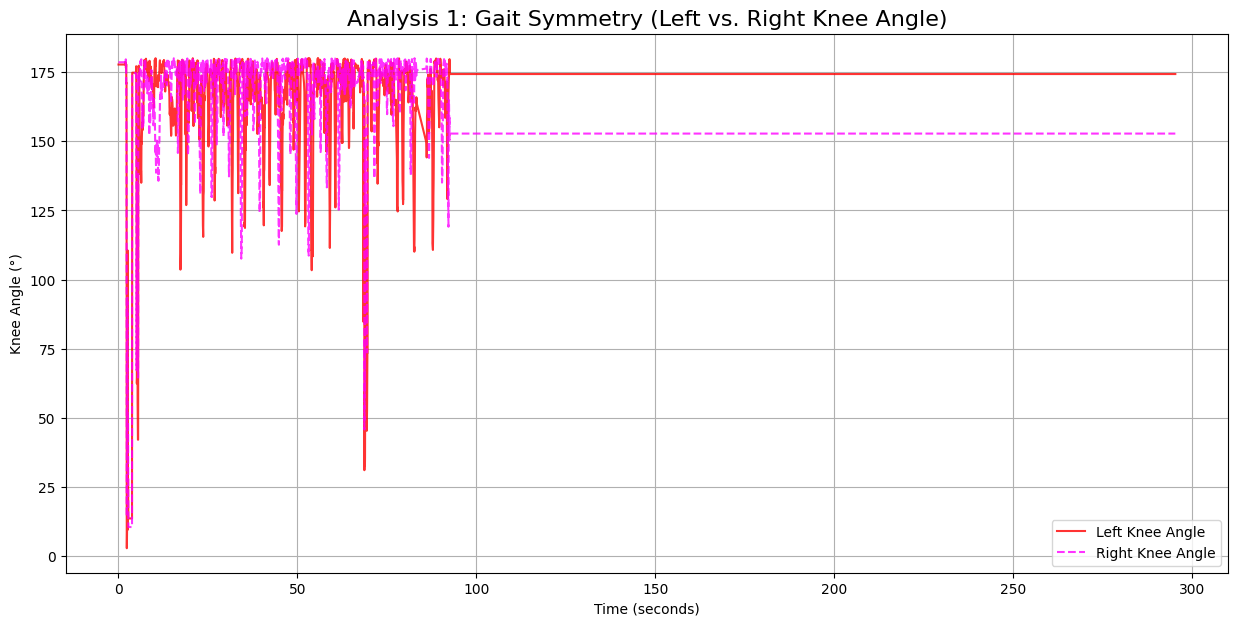

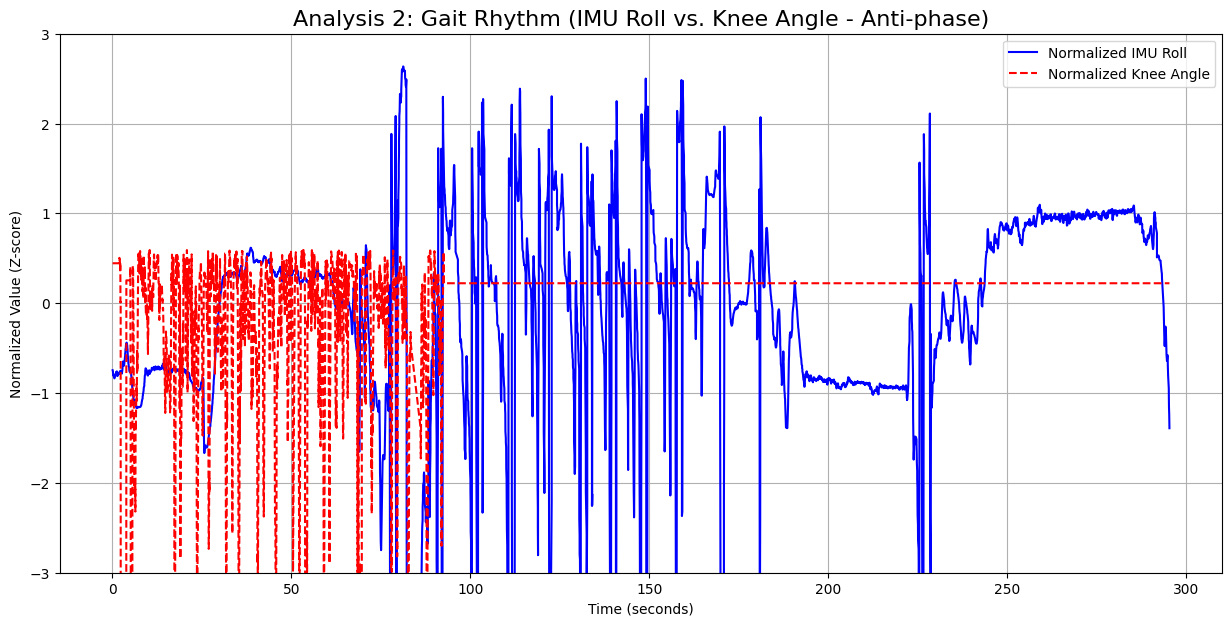

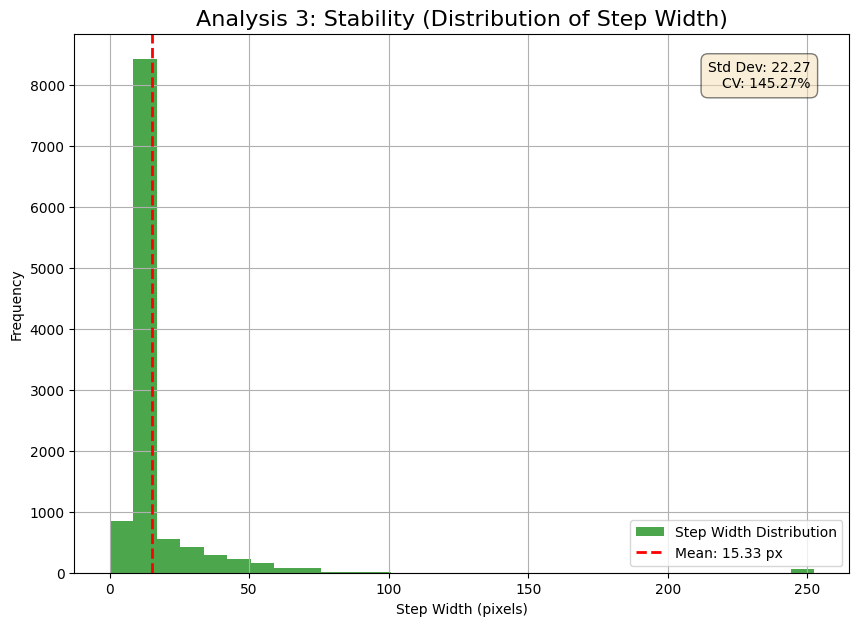

In [13]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# --- üö® 1Îã®Í≥ÑÏóêÏÑú Ï∞æÏùÄ ÎèôÍ∏∞Ìôî ÏãúÍ∞ÑÏùÑ Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
IMU_SYNC_TIME = '16:26:27.756000'  # ÏòàÏãú: IMU Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î∞ú Íµ¨Î•∏ ÏãúÍ∞Ñ
VIDEO_SYNC_TIME_SEC = 18.337583      # ÏòàÏãú: ÏòÅÏÉÅ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î∞ú Íµ¨Î•∏ Í≤ΩÍ≥º ÏãúÍ∞Ñ
# ---------------------------------------------------------

try:
    # --- 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è ÎèôÍ∏∞Ìôî/ÌÜµÌï© (Ïù¥Ï†ÑÍ≥º ÎèôÏùº) ---
    imu5_df = pd.read_csv('imu_data5.csv')
    video_df = pd.read_csv('realtime_gait_analysis.csv')

    imu5_df['time'] = pd.to_datetime(imu5_df['time'], format='%H:%M:%S.%f')
    imu_sync_ts = pd.to_datetime(IMU_SYNC_TIME, format='%H:%M:%S.%f')
    imu5_df = imu5_df[imu5_df['time'] >= imu_sync_ts].copy()
    imu5_df['elapsed_sec'] = (imu5_df['time'] - imu_sync_ts).dt.total_seconds()
    imu5_df.set_index('elapsed_sec', inplace=True)
    
    video_df = video_df[video_df['Time_sec'] >= VIDEO_SYNC_TIME_SEC].copy()
    video_df['elapsed_sec'] = video_df['Time_sec'] - VIDEO_SYNC_TIME_SEC
    video_df.set_index('elapsed_sec', inplace=True)

    combined_df = imu5_df.join(video_df.reindex(imu5_df.index, method='nearest'), how='inner').dropna()
    print("‚úÖ Îç∞Ïù¥ÌÑ∞ ÎèôÍ∏∞Ìôî Î∞è ÌÜµÌï© ÏôÑÎ£å!")

    # --- 2. Î∂ÑÏÑù 1: Î≥¥Ìñâ ÎåÄÏπ≠ÏÑ± ÏãúÍ∞ÅÌôî ---
    plt.figure(figsize=(15, 7))
    plt.plot(combined_df.index, combined_df['Left_Knee_Angle'], label='Left Knee Angle', color='red', alpha=0.8)
    plt.plot(combined_df.index, combined_df['Right_Knee_Angle'], label='Right Knee Angle', color='magenta', linestyle='--', alpha=0.8)
    plt.title('Analysis 1: Gait Symmetry (Left vs. Right Knee Angle)', fontsize=16)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Knee Angle (¬∞)')
    plt.legend()
    plt.grid(True)

    # --- 3. Î∂ÑÏÑù 2: Î≥¥Ìñâ Î¶¨Îì¨ ÏãúÍ∞ÅÌôî ---
    # Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî (z-score)
    roll_norm = (combined_df['Roll'] - combined_df['Roll'].mean()) / combined_df['Roll'].std()
    knee_norm = (combined_df['Left_Knee_Angle'] - combined_df['Left_Knee_Angle'].mean()) / combined_df['Left_Knee_Angle'].std()
    
    plt.figure(figsize=(15, 7))
    plt.plot(combined_df.index, roll_norm, label='Normalized IMU Roll', color='blue')
    plt.plot(combined_df.index, knee_norm, label='Normalized Knee Angle', color='red', linestyle='--')
    plt.title('Analysis 2: Gait Rhythm (IMU Roll vs. Knee Angle - Anti-phase)', fontsize=16)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Normalized Value (Z-score)')
    plt.legend()
    plt.grid(True)
    # yÏ∂ïÏùò 0ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏúÑÏïÑÎûòÍ∞Ä Ïûò Î≥¥Ïù¥ÎèÑÎ°ù Î≤îÏúÑ ÏÑ§Ï†ï
    plt.ylim(-3, 3)

    # --- 4. Î∂ÑÏÑù 3: ÏïàÏ†ïÏÑ± ÏãúÍ∞ÅÌôî ---
    step_width_mean = combined_df['Step_Width_px'].mean()
    step_width_std = combined_df['Step_Width_px'].std()
    step_width_cv = (step_width_std / step_width_mean) * 100
    
    plt.figure(figsize=(10, 7))
    plt.hist(combined_df['Step_Width_px'], bins=30, alpha=0.7, color='green', label='Step Width Distribution')
    plt.axvline(step_width_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {step_width_mean:.2f} px')
    
    # ÌÖçÏä§Ìä∏ Ï†ïÎ≥¥ Ï∂îÍ∞Ä
    plt.text(0.95, 0.95, f'Std Dev: {step_width_std:.2f}\nCV: {step_width_cv:.2f}%', 
             ha='right', va='top', transform=plt.gca().transAxes, bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))
             
    plt.title('Analysis 3: Stability (Distribution of Step Width)', fontsize=16)
    plt.xlabel('Step Width (pixels)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

except FileNotFoundError:
    print("‚ùå ÌïÑÏöîÌïú CSV ÌååÏùºÎì§ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
except Exception as e:
    print(f"Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")